# ハイパーパラメーターとチューニング(1)

- **[2.1 ハイパーパラメーターとチューニング](#2.1-ハイパーパラメーターとチューニング)**
    - **[2.1.1 ハイパーパラメーターとは](#2.1.1-ハイパーパラメーターとは)**
    - **[2.1.2 チューニングとは](#2.1.2-チューニングとは)**
<br><br>
- **[2.2 ロジスティック回帰のハイパーパラメーター](#2.2-ロジスティック回帰のハイパーパラメーター)**
    - **[2.2.1 パラメーター C](#2.2.1-パラメーター C)**
    - **[2.2.2 パラメーター penalty](#2.2.2-パラメーター penalty)**
    - **[2.2.3 パラメーター multi_class](#2.2.1-パラメーター multi_class)**
    - **[2.2.4 パラメーター random_state](#2.2.1-パラメーター random_state)**
<br><br>
- **[2.3 線形SVMのハイパーパラメーター](#2.3-線形SVMのハイパーパラメーター)**
    - **[2.3.1 パラメーター C](#2.3.1-パラメーター C)**
    - **[2.3.2 パラメーター penalty](#2.3.2-パラメーター penalty)**
    - **[2.3.3 パラメーター multi_class](#2.3.1-パラメーター multi_class)**
    - **[2.3.4 パラメーター random_state](#2.3.1-パラメーター random_state)**
<br><br>
- **[2.4 非線形SVMのハイパーパラメーター](#2.4-非線形SVMのハイパーパラメーター)**
    - **[2.4.1 パラメーター C](#2.2.1-パラメーター C)**
    - **[2.4.2 パラメーター kernel](#2.2.2-パラメーター kernel)**
    - **[2.4.3 パラメーター decision_function_shape](#2.2.1-パラメーター decision_function_shape)**
    - **[2.4.4 パラメーター random_state](#2.2.1-パラメーター random_state)**
<br><br>
- **[2.5 添削問題](#2.5-添削問題)**

***

## 2.1 ハイパーパラメーターとチューニング

### 2.1.1 ハイパーパラメーターとは

機械学習においても学習過程全てを自動化することは難しく、人の手でモデルを調整しなければならない場合が存在します。

ハイパーパラメーターとは **機械学習のモデルが持つパラメーターの中で人が調整をしないといけないパラメーター** のことです。

ハイパーパラメーターは選択した手法によって異なるため、モデルごとに説明をしていきます。

#### 問題

- ハイパーパラメーターについて説明しているのは次の文章のうちどれでしょうか。

1. チューニングすることによって機械学習の精度を上げることができるたった一つのパラメーターのこと。
1. モデルの学習によって得られるパラメーターのこと。
1. 人間の手によって調整しなければならないパラメーターのこと。
1. 調整を行わなくても良いパラメーターのこと。

#### ヒント

ハイパーパラメーターは人間の手で調整する必要があります。

#### 解答

人間の手によって調整しなければならないパラメーターのこと。

***

### 2.1.2 チューニングとは

ハイパーパラメーターを調整することをチューニングと呼びます。
調整方法については直接値をモデルに入力すること以外にも、ハイパーパラメーターの値の範囲を指定することで最適な値を探してもらう方法も存在します。
    
scikit-learnではモデルの構築時にパラメーターに値を入力することでパラメーターのチューニングが可能です。
パラメーターを入力しなかった場合、モデルごとに定められているパラメーターの初期値がそのまま値として指定されます。
    
コードとしては以下のようなものとなります。

```python
# 架空のモデルClassifierを例にしたチューニング方法
model = Classifier(param1=1.0, param2=True, param3="linear")
```

#### 問題

- とあるモデルClassifierのパラメーターparam1、param2、param3にそれぞれ10、False、"set"という値を入力することを考えます。
- この条件を満たすコードは次のうちどれでしょうか。

1. `model = Classifier(param1=set, param2=False, param3=10)`
1. `model = Classifier(param1=10, param2=False, param3="set")`
1. `model = Classifier(param1=10, param2=False, param3=set)`
1. `model = Classifier(param1=False, param2="set", param3=10)`

#### ヒント

- param1=10となっているものを選びましょう。
- "set"は文字列です。

#### 解答

`model = Classifier(param1=10, param2=False, param3="set")`

***

## 2.2 ロジスティック回帰のハイパーパラメーター

### 2.2.1 パラメーター C

ロジスティック回帰にはCというパラメーターが存在します。
このCはモデルが学習する識別境界線が教師データの分類間違いに対してどのくらい厳しくするのかという指標になります。
    
Cの値が大きいほどモデルは教師データを完全に分類できるような識別線を学習するようになります。
しかし教師データに対して過剰なほどの学習を行うために過学習に陥り、訓練データ以外のデータに予測を行うと正解率が下がる場合が多くなります。
    
Cの値を小さくすると教師データの分類の誤りに寛容になります。
分類間違いを許容することで外れ値データに境界線が左右されにくくなりより一般化された境界線を得やすくなります。
ただし、外れ値の少ないデータでは境界線がうまく識別できていないものになってしまう場合もあります。
また、極端に小さくてもうまく境界線が識別できません。
    
**scikit-learnのロジスティック回帰モデルのCの初期値は1.0です。**

#### 問題

- Cの値が変化することによってどのくらいモデルの正解率が変わるかをグラフで確認しましょう。ただし`random_state=42`としてください。
- Cの値の候補が入っているリストC_listを用いて教師用データの正解率とテスト用データの正解率をプロットしたグラフをmatplotlibを用いてグラフ化してください。

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

# データの生成
X, y = make_classification(
    n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# Cの値の範囲を設定(今回は1e-5,1e-4,1e-3,0.01,0.1,1,10,100,1000,10000)
C_list = [10 ** i for i in range(-5, 5)]

# グラフ描画用の空リストを用意
train_accuracy = []
test_accuracy = []

# 以下にコードを書いてください。
for C in C_list:

# コードの編集はここまでです。


# グラフの準備
# semilogx()はxのスケールを10のx乗のスケールに変更する
plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")
plt.title("accuracy by changing C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()

#### ヒント

- for文を使ってC_listに納められているCの値を取り出し、モデルに学習させましょう。
- ロジスティック回帰モデルのCの値を調整するにはモデルの構築時に次のように引数にCの値を渡します。  
`model = LogisticRegression(C=1.0)`
- 訓練データ、テスト用データそれぞれの正解率をそれぞれ`train_accuracy`,`test_accuracy`というリストに入れましょう。

#### 解答例

/usr/local/var/pyenv/versions/anaconda3-5.2.0/envs/py3.7.0/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/var/pyenv/versions/anaconda3-5.2.0/envs/py3.7.0/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/var/pyenv/versions/anaconda3-5.2.0/envs/py3.7.0/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/var/pyenv/versions/anaconda3-5.2.0/envs/py3.7.0/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


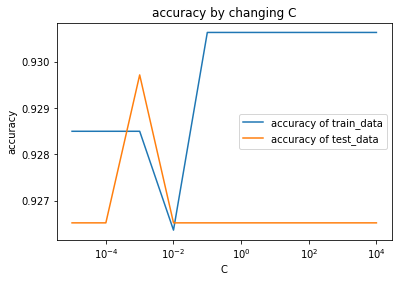

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

# データの生成
X, y = make_classification(
    n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# Cの値の範囲を設定(今回は1e-5,1e-4,1e-3,0.01,0.1,1,10,100,1000,10000)
C_list = [10 ** i for i in range(-5, 5)]

# グラフ描画用の空リストを用意
train_accuracy = []
test_accuracy = []

# 以下にコードを書いてください。
for C in C_list:
    model = LogisticRegression(C=C, random_state=42)
    model.fit(train_X, train_y)

    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y))

# コードの編集はここまでです。
    
# グラフの準備
# semilogx()はxのスケールを10のx乗のスケールに変更する
plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")
plt.title("accuracy by changing C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### 2.2.2 パラメーター penalty

先ほどのCが分類の誤りの許容度だったのに対し、penaltyはモデルの複雑さに対するペナルティを表します。

penaltyに入力できる値は二つ、「L1」と「L2」です。
基本的には「L2」を選べば大丈夫ですが、「L1」を選ぶ方が欲しいデータが得られる場合もあります。
    
- **L1**  
    データの特徴量を削減することで識別境界線の一般化を図るペナルティです。
- **L2**  
    データ全体の重みを減少させることで識別境界線の一般化を図るペナルティです。

#### 問題

- ペナルティについて正しい説明を選んでください。

1. L1はデータ全体を概観してペナルティを決定する方法である。
1. L2はデータの一部を見てモデルに対するペナルティを決定する方法である。
1. L1とL2に差はない。
1. ペナルティとは、モデルが複雑になりすぎて一般化した問題を解決できなくなることを防ぐために与えられる。

#### ヒント

- L1はデータの余分な特徴量を省き、主要な特徴だけでモデルに説明させようとするペナルティの手法です。
- L2はデータ全体の重みを減らすことでデータ同士の関係性を弱くしモデルを簡易化しようとするペナルティの手法です。

#### 解答

ペナルティとは、モデルが複雑になりすぎて一般化した問題を解決できなくなることを防ぐために与えられる。

***

### 2.2.3 パラメーター multi_class

multi_classは多クラス分類を行う際にモデルがどういった動作を行うかということを決めるパラメーターです。
ロジスティック回帰では「ovr」、「multinomial」の2つの値が用意されています。
    
- ovr  
    クラスに対して「属する/属さない」の二値で応えるような問題に適しています。
- multinomial  
    各クラスに分類される確率も考慮され、「属する/属さない」だけではなく「どれくらい属する可能性があるか」を扱う問題に適しています。

#### 問題

- multi_classについて説明している文章のうち正しいのはどれでしょうか。

1. ovrは各ラベル同士の総当たりでラベルを決定する。
1. multi_classは多ラベルの分類を行う際にどのようにモデルが動作するかを示すパラメーターである。
1. multinomialはラベルに関係なくデータが誤分類される確率を考える。
1. multi_classを適切に設定すると線形分離可能でないデータも分類可能になる。

#### ヒント

- multi_classは多クラス分類を行う際の挙動を示しています。

#### 解答

multi_classは多ラベルの分類を行う際にどのようにモデルが動作するかを示すパラメーターである。

***

### 2.2.4 パラメーター random_state

モデルは学習の際にデータをランダムな順番で処理していくのですが、random_stateはその順番を制御するためのパラメーターです。
ロジスティック回帰モデルの場合、データによっては処理順によって大きく境界線が変わる場合があります。
    
また、このrandom_stateの値を固定することで同じデータでの学習結果を保存することができます。
当講座でも実行時に結果が変わらないようにrandom_stateの値は基本的に固定しています。
    
当講座で用いているデータはrandom_stateを変えても結果があまり変わりませんが、実際に用いる場合にはデータの再現性も考えてrandom_stateの値を固定するとよいでしょう。

#### 問題

- random_stateを固定する理由として正しいのは以下のうちどれでしょうか。

1. 学習の結果が変わらないようにするため。
1. データの予測時にランダムで値が変わるようにするため。
1. データの選び方をバラバラにするため。
1. 学習結果をランダムに入れ替えることでデータの難読化を行うため。

#### ヒント

- random_stateが決まるとアルゴリズム内で使われる乱数の値が全て決まります。

#### 解答

学習の結果が変わらないようにするため。

***

## 2.3 線形SVMのハイパーパラメーター

### 2.3.1 パラメーター C

SVMにもロジスティック回帰と同様に分類の誤りの許容度を示すCがパラメーターとして定義されています。
使い方もロジスティック回帰と同様です。
    
SVMはロジスティック回帰に比べてCによるデータのラベルの予測値変動が激しいです。
SVMのアルゴリズムはロジスティック回帰にくらべてより一般化された境界線を得るため、誤りの許容度が上下するとサポートベクターが変化し、ロジスティック回帰よりも正解率が上下することになります。
    
線形SVMモデルではCの初期値は1.0です。
    
モジュールはLinearSVCを利用します。

#### 問題

- 線形SVMとロジスティック回帰でのCの値の変動による正解率の変動の違いをグラフにしてみましょう。
- Cの値の候補であるC_listが渡されますので、線形SVMとロジスティック回帰のモデルをそれぞれ構築し、サブプロットを用いて2つのグラフに出力してください。
- 1つのグラフには教師用データに対する正解率とテスト用データに対する正解率の2つのグラフが出力されるようにしてください。

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# Cの値の範囲を設定(今回は1e-5,1e-4,1e-3,0.01,0.1,1,10,100,1000,10000)
C_list = [10 ** i for i in range(-5, 5)]

# グラフ描画用の空リストを用意
svm_train_accuracy = []
svm_test_accuracy = []
log_train_accuracy = []
log_test_accuracy = []

# 以下にコードを書いてください。
for C in C_list:


# コードの編集はここまでです。
    
# グラフの準備
# semilogx()はxのスケールを10のx乗のスケールに変更する

fig = plt.figure()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.set_title("SVM")
ax.set_xlabel("C")
ax.set_ylabel("accuracy")
ax.semilogx(C_list, svm_train_accuracy, label="accuracy of train_data")
ax.semilogx(C_list, svm_test_accuracy, label="accuracy of test_data")
ax.legend()
ax.plot()
plt.show()
fig2 =plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.grid(True)
ax2.set_title("LogisticRegression")
ax2.set_xlabel("C")
ax2.set_ylabel("accuracy")
ax2.semilogx(C_list, log_train_accuracy, label="accuracy of train_data")
ax2.semilogx(C_list, log_test_accuracy, label="accuracy of test_data")
ax2.legend()
ax2.plot()
plt.show()

#### ヒント

- for文を使ってC_listの中身を取り出しましょう。
- Cの値のチューニングの仕方は以下の通りです。  
`model = LinearSVC(C=1.0)`

#### 解答例

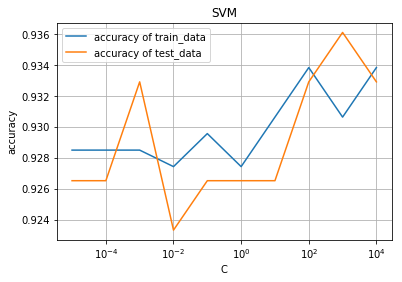

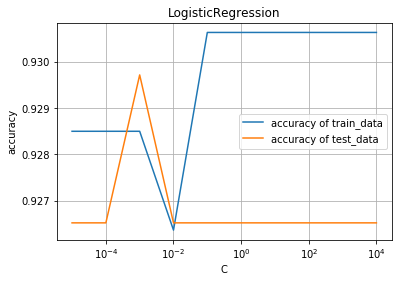

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

# データの生成
X, y = make_classification(
    n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# Cの値の範囲を設定(今回は1e-5,1e-4,1e-3,0.01,0.1,1,10,100,1000,10000)
C_list = [10 ** i for i in range(-5, 5)]

# グラフ描画用の空リストを用意
svm_train_accuracy = []
svm_test_accuracy = []
log_train_accuracy = []
log_test_accuracy = []

# 以下にコードを書いてください。
for C in C_list:
    model1 = LinearSVC(C=C, random_state=42)
    model1.fit(train_X, train_y)
    svm_train_accuracy.append(model1.score(train_X, train_y))
    svm_test_accuracy.append(model1.score(test_X, test_y))
    
    model2 = LogisticRegression(C=C, random_state=42)
    model2.fit(train_X, train_y)
    log_train_accuracy.append(model2.score(train_X, train_y))
    log_test_accuracy.append(model2.score(test_X, test_y))

# コードの編集はここまでです。
    
# グラフの準備
# semilogx()はxのスケールを10のx乗のスケールに変更する

fig = plt.figure()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.set_title("SVM")
ax.set_xlabel("C")
ax.set_ylabel("accuracy")
ax.semilogx(C_list, svm_train_accuracy, label="accuracy of train_data")
ax.semilogx(C_list, svm_test_accuracy, label="accuracy of test_data")
ax.legend()
ax.plot()
plt.show()
fig2 =plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.grid(True)
ax2.set_title("LogisticRegression")
ax2.set_xlabel("C")
ax2.set_ylabel("accuracy")
ax2.semilogx(C_list, log_train_accuracy, label="accuracy of train_data")
ax2.semilogx(C_list, log_test_accuracy, label="accuracy of test_data")
ax2.legend()
ax2.plot()
plt.show()

***

### 2.3.2 パラメーター penalty

ロジスティック回帰同様に線形SVMにもpenaltyのパラメーターがあります。
設定できる値も同じく、 **"L1"** と **"L2"** です。

#### 問題

 -　データの要素がA,B,C,Dの4種類であり、ラベルがDである時、次のペナルティに関する説明のうち正しいものを選んでください。

1. A,B,Cの間に相関性がない時ペナルティはL1を選ぶべきである。
1. L2ペナルティはデータ同士の依存性を高める。
1. B=2A,C=Aの関係がある時、L1ペナルティはBとCの重みを減らしAだけでモデルに説明させるように働く。
1. L2ペナルティはDに対してA,B,Cのいずれかが関連性が高い場合、その関連性を失わせる方向に働く。

#### ヒント

- L1ペナルティは主成分を抽出する働きがあります。
- L2ペナルティは特定の相関性を見ず、データ全体の関係性を用いてモデルを説明しようとします。

#### 解答

B=2A,C=Aの関係がある時、L1ペナルティはBとCの重みを減らしAだけでモデルに説明させるように働く。

***

### 2.3.3 パラメーター multi_class

multi_classは多項分類を行う際にモデルがどういった動作を行うかということを決めるパラメーターです。
線形SVMでは「ovr」、「crammer_singer」の2つの値が用意されています。
基本的にはovrの方が動作が軽く結果が良いです。

#### 問題

- multi_classに関する説明のうち正しいものを選択してください。

1. 多クラス分類を行う際に値が設定されていると正解率が向上する。
1. ovrとcrammer_singerではcrammer_singerのほうが正解率がいい。
1. Yes or Noの二値分類ではこの値は無視される。
1. LinearSVCでは意味のないパラメーターである。

#### ヒント

- 線形SVMではmulti_classの初期値はovrです。
- 二値分類の場合このパラメーターを設定する必要はありません。

#### 解答

Yes or Noの二値分類ではこの値は無視される。

***

### 2.3.4 パラメーター random_state

結果の固定に用いられるrandom_stateですが、SVMに関してはサポートベクターの決定にも関わります。
最終的に学習する境界線はほぼ同じになるものの、わずかながら差異が出ることに留意してください。

#### 問題

- random_stateを固定する時に正しい文章を以下の選択肢から選んでください。

1. 数値を固定して結果を固定するのに使うため、数値の値はいくつでも良い。
1. モデルの学習時にはrandom_stateは特定の値にしなければならない。
1. random_stateの値はそのまま乱数の値として用いられる。
1. random_stateは調整の必要がない。

#### ヒント

- random_stateは値が違うと差異が生じる場合があります。特にデータ同士が密接せず散らばっている場合はサポートベクターの選択が変わるため境界線に大きく影響します。
- random_stateの値が同じ値であれば、同じ操作をする限りモデルは同じ予測結果を返します。

#### 解答

数値を固定して結果を固定するのに使うため、数値の値はいくつでも良い。

***

## 2.4 非線形SVMのハイパーパラメーター

###  2.4.1 パラメーター C

線形分離可能でないデータを扱う場合SVMのSVCというモジュールを使います。
SVCでもロジティック回帰、SVMと同様にパラメーターCが存在します。
    
非線形SVMではCのことをソフトマージンのペナルティと呼びます。
学習時に分類の誤りをどの程度許容するかを指定するパラメーターです。

#### 問題

- Cの値が変化することによってどのくらいモデルの正解率が変わるかをグラフで確認しましょう。
- Cの値の候補が入っているリストC_listを用いて教師用データの正解率とテスト用データの正解率をプロットしたグラフをmatplotlibを用いてグラフ化してください。

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


# データの生成
X, y = make_gaussian_quantiles(n_samples=1250, n_features=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# Cの値の範囲を設定(今回は1e-5,1e-4,1e-3,0.01,0.1,1,10,100,1000,10000)
C_list = [10 ** i for i in range(-5, 5)]

# グラフ描画用の空リストを用意
train_accuracy = []
test_accuracy = []

# 以下にコードを書いてください。
for C in C_list:


# コードの編集はここまでです。

# グラフの準備
# semilogx()はxのスケールを10のx乗のスケールに変更する
plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")
plt.title("accuracy with changing C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()

#### ヒント

- for文を使ってC_listに納められているCの値を取り出し、モデルに学習させましょう。
- 非線形SVMのCの値を調整するにはモデルの構築時に次のように引数にCの値を渡します。  
`model = SVC(C=1.0, random_state=42)`
- 教師データ、テスト用データそれぞれの正解率をそれぞれ`train_accuracy`,`test_accuracy`というリストに入れましょう。

#### 解答例

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_gaussian_quantiles(n_samples=1250, n_features=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# Cの値の範囲を設定(今回は1e-5,1e-4,1e-3,0.01,0.1,1,10,100,1000,10000)
C_list = [10 ** i for i in range(-5, 5)]

# グラフ描画用の空リストを用意
train_accuracy = []
test_accuracy = []

# 以下にコードを書いてください。
for C in C_list:
    model = SVC(C=C)
    model.fit(train_X, train_y)

    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y))

# コードの編集はここまでです。

# グラフの準備
# semilogx()はxのスケールを10のx乗のスケールに変更する
plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")
plt.title("accuracy with changing C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()

***

### 2.4.2 パラメーター kernel

パラメーターkernelは非線形SVMの中でも特に重要なパラメーターであり、受け取ったデータを操作して分類しやすい形にするための関数を定義するパラメーターです。
    
`linear`、`rbf`、`poly`、`sigmoid`、`precomputed`の5つを値としてとることができます。デフォルトは`rbf`です。

`linear`は線形SVMであり、LinearSVCとほぼ同じです。特殊な理由がない限りはLinearSVCを使いましょう。

`rbf`、`poly`は立体投影のようなものです。rbfは他のものに比べ比較的高い正解率が出ることが多いので通常はデフォルトであるrbfを使用します。

`precomputed`はデータが前処理によってすでに整形済みの場合に用います。

`sigmoid`はロジスティック回帰モデルと同じ処理を行います。


#### 問題

- kernelの値に関して、正しい説明はどれでしょうか。

1. linearは線形カーネルであり、LinearSVCよりも良いチューニングがされている。
1. rbfは比較的高い正解率を出すことができる。
1. precomputedはどのようなデータに対してでも用いることができる。
1. sigmoidはロジスティック回帰モデルそのものである。

#### ヒント

- LinearSVCとSVC(kernel="linear")では特別に定義されているLinearSVCの方が優れています。

#### 解答

rbfは比較的高い正解率を出すことができる。

***

### 2.4.3 パラメーター decision_function_shape

`decision_function_shape` はSVCにおけるmulti_classパラメーターのようなものです。

`ovo`、`ovr`の2つの値が用意されています。
    
`ovo`はクラス同士のペアを作り、そのペアでの2項分類を行い多数決で属するクラスを決定するという考え方です。
    
`ovr`は一つのクラスとそれ以外という分類を行い多数決で属するクラスを決定します。
    
`ovo`の方は計算量が多くデータの量の増大によっては動作が重くなることが考えられます。

#### 問題

- `decision_function_shape`に関する次の説明のうち正しいのはどれでしょうか。

1. ovrは他のクラスとの1対1の分類器を作成し、総当たりでクラスを決定する方法である。
1. ovoは計算量が少なく実行速度も速くなる傾向がある。
1. ovrは線形分離可能なデータに強い。
1. ovoとovrではovoの方がデータが増えた時の実行時間の増加量が大きい。

#### ヒント

- ovoはone vs oneの略で各クラス同士の総当たりの分類器を作成し予測します。
- ovrはone vs restの略で各クラスの自身とそれ以外を分類する分類器を作成し予測します。

#### 解答

ovoとovrではovoの方がデータが増えた時の実行時間の増加量が大きい。

***

### 2.4.4 パラメーター random_state

データの処理順に関係するパラメーターです。
予測結果を再現するために、学習の段階では固定することを推奨します。
    
機械学習を実際に行う時には乱数を生成するための生成器を指定する方法があります。
生成器を指定する場合のコードは以下の通りです。
    
```python
import numpy as np
from sklearn.svm import SVC

# 乱数生成器を構築
random_state = np.random.RandomState()

# 乱数生成器をrandom_stateに指定したSVMモデルを構築
model = SVC(random_state=random_state)
```

#### 問題

- 非線形SVMモデルのパラメーターrandom_stateに乱数生成器を渡してモデルに学習をさせてください。
- テスト用データに対する正解率を出力してください。

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# 以下にコードを書いてください。
# 乱数生成器の構築
#ここに答えを書いてください

# モデルの構築
#ここに答えを書いてください

# モデルの学習
#ここに答えを書いてください

# テストデータに対する正解率を出力
#ここに答えを書いてください

#### ヒント

- 乱数生成器を構築する関数には忘れずに`np.random`をつけましょう。

#### 解答例

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# 以下にコードを書いてください。
# 乱数生成器の構築
random_state = np.random.RandomState()

# モデルの構築
model = SVC(random_state=random_state)

# モデルの学習
model.fit(train_X, train_y)

# テストデータに対する正解率を出力
print(model.score(test_X, test_y))

***